In [1]:
import sys
# Make imports work
sys.path.insert(0, '../')

In [2]:
import importlib
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from mhealth_anomaly_detection import plots
from mhealth_anomaly_detection import format_axis as fa
from mhealth_anomaly_detection import datasets
from mhealth_anomaly_detection import anomaly_detection as ad 
from mhealth_anomaly_detection import load_refs as lr

/Users/akre96/Library/Caches/pypoetry/virtualenvs/mhealth-anomaly-detection-Qbd7iEZF-py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [111]:
importlib.reload(datasets)
year=2
dataset = datasets.GLOBEM(
    data_path='~/Data/mHealth_external_datasets/GLOBEM',
    year=year,
    sensor_data_types=['sleep', 'steps', 'location', 'call'],
)
data = dataset.data
data

/Users/akre96/Code/dgc/mhealth_anomaly_detection/notebooks/../mhealth_anomaly_detection/datasets.py:172: DtypeWarning: Columns (478,577) have mixed types. Specify dtype option on import or set low_memory=False.
  data = df


Filtering only daily features. Going from 3402 to 1890 features
Filtering columns with high missingness. Going from 1894 to 1258 features
Filtering redundant features. Going from 1255 to 357 features
Filling empty study days with NaN values going from 21146 to 21146 . Added  0
Filtering high missing participants - removing 26 from dataset


,subject_id,platform,date,study_day,f_loc:phone_locations_locmap_percent_in_locmap_greens:allday,f_loc:phone_locations_locmap_duration_in_locmap_greens:allday,f_loc:phone_locations_locmap_percent_in_locmap_exercise:allday,f_loc:phone_locations_locmap_duration_in_locmap_exercise:allday,f_loc:phone_locations_locmap_percent_in_locmap_study:allday,f_loc:phone_locations_doryab_avglengthstayatclusters:allday,...,f_call:phone_calls_rapids_missed_countmostfrequentcontact:morning,f_call:phone_calls_rapids_missed_distinctcontacts:morning,f_call:phone_calls_rapids_missed_count:morning,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:evening,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:evening,f_call:phone_calls_rapids_missed_timefirstcall:afternoon,f_call:phone_calls_rapids_missed_timelastcall:afternoon,f_call:phone_calls_rapids_outgoing_stdduration:evening,f_call:phone_calls_rapids_outgoing_stdduration:afternoon,phq4
0,INS-W_300,ios,2019-03-21,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INS-W_300,ios,2019-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INS-W_300,ios,2019-03-23,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INS-W_300,ios,2019-03-24,3,0.000000,0.000000,0.000000,0.000000,0.000000,158.768383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INS-W_300,ios,2019-03-25,4,1.299894,18.718083,6.537361,94.136033,6.067866,1285.315367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21141,INS-W_572,ios,2019-06-21,92,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21142,INS-W_572,ios,2019-06-22,93,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21143,INS-W_572,ios,2019-06-23,94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21144,INS-W_572,ios,2019-06-24,95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
plot_features = [
'phq4',
'f_loc:phone_locations_doryab_locationentropy:allday',
'f_loc:phone_locations_barnett_circdnrtn:allday',
'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday',
'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday',
'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
'f_call:phone_calls_rapids_missed_count:allday',
'f_call:phone_calls_rapids_incoming_count:allday',
'f_call:phone_calls_rapids_outgoing_count:allday',
'f_call:phone_calls_rapids_outgoing_sumduration:allday',
]
fig_dir = Path('..', 'output', f'GLOBEM_{year}', 'lineplot')
fig_dir.mkdir(
    parents=True,
    exist_ok=True
)
palette = lr.get_colors('../lib/colors.json')

In [5]:
data.melt(
    id_vars=dataset.id_cols,
    value_vars=plot_features,
    var_name='feature',
    value_name='value'
)

,subject_id,platform,date,study_day,feature,value
0,INS-W_300,ios,2019-03-21,0,phq4,NaN
1,INS-W_300,ios,2019-03-22,1,phq4,NaN
2,INS-W_300,ios,2019-03-23,2,phq4,NaN
3,INS-W_300,ios,2019-03-24,3,phq4,NaN
4,INS-W_300,ios,2019-03-25,4,phq4,NaN
...,...,...,...,...,...,...
613229,INS-W_572,ios,2019-06-21,92,f_call:phone_calls_rapids_outgoing_entropydura...,NaN
613230,INS-W_572,ios,2019-06-22,93,f_call:phone_calls_rapids_outgoing_entropydura...,NaN
613231,INS-W_572,ios,2019-06-23,94,f_call:phone_calls_rapids_outgoing_entropydura...,NaN
613232,INS-W_572,ios,2019-06-24,95,f_call:phone_calls_rapids_outgoing_entropydura...,NaN


In [62]:

passive_feature_rep = [
'f_loc:phone_locations_doryab_locationentropy:allday',
'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
'f_call:phone_calls_rapids_outgoing_meanduration:allday',
]

<AxesSubplot: xlabel='feature', ylabel='subject_id'>

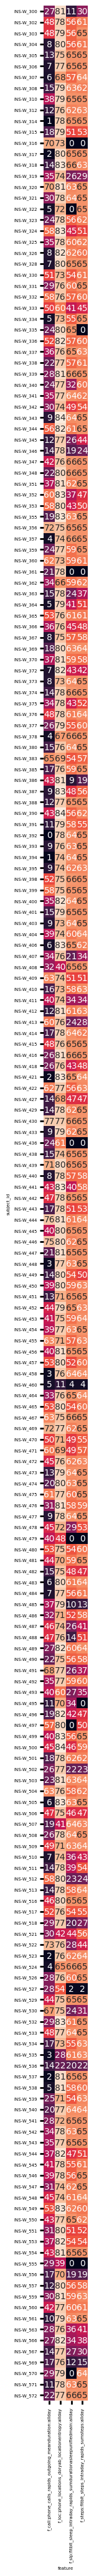

In [67]:
fig, ax = plt.subplots(figsize=(30,50))

sns.heatmap(
    data.melt(
        id_vars=dataset.id_cols,
        value_vars=passive_feature_rep,
        var_name='feature',
        value_name='value'
    ).pivot_table(
        index='subject_id',
        columns='feature',
        aggfunc='count',
        values='value',
        fill_value=0
    ),
    annot=True,
    cbar=False,
    ax=ax,
    square=True,
)
fa.despine_thicken_axes(ax, heatmap=True, fontsize=5, x_rotation=90)

/var/folders/yl/t10bslz11cgdwwfk10mvyr1h0000gn/T/ipykernel_39065/2362809559.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).reset_index().groupby(['study_day']).sum()


<AxesSubplot: xlabel='subject_id', ylabel='study_day'>

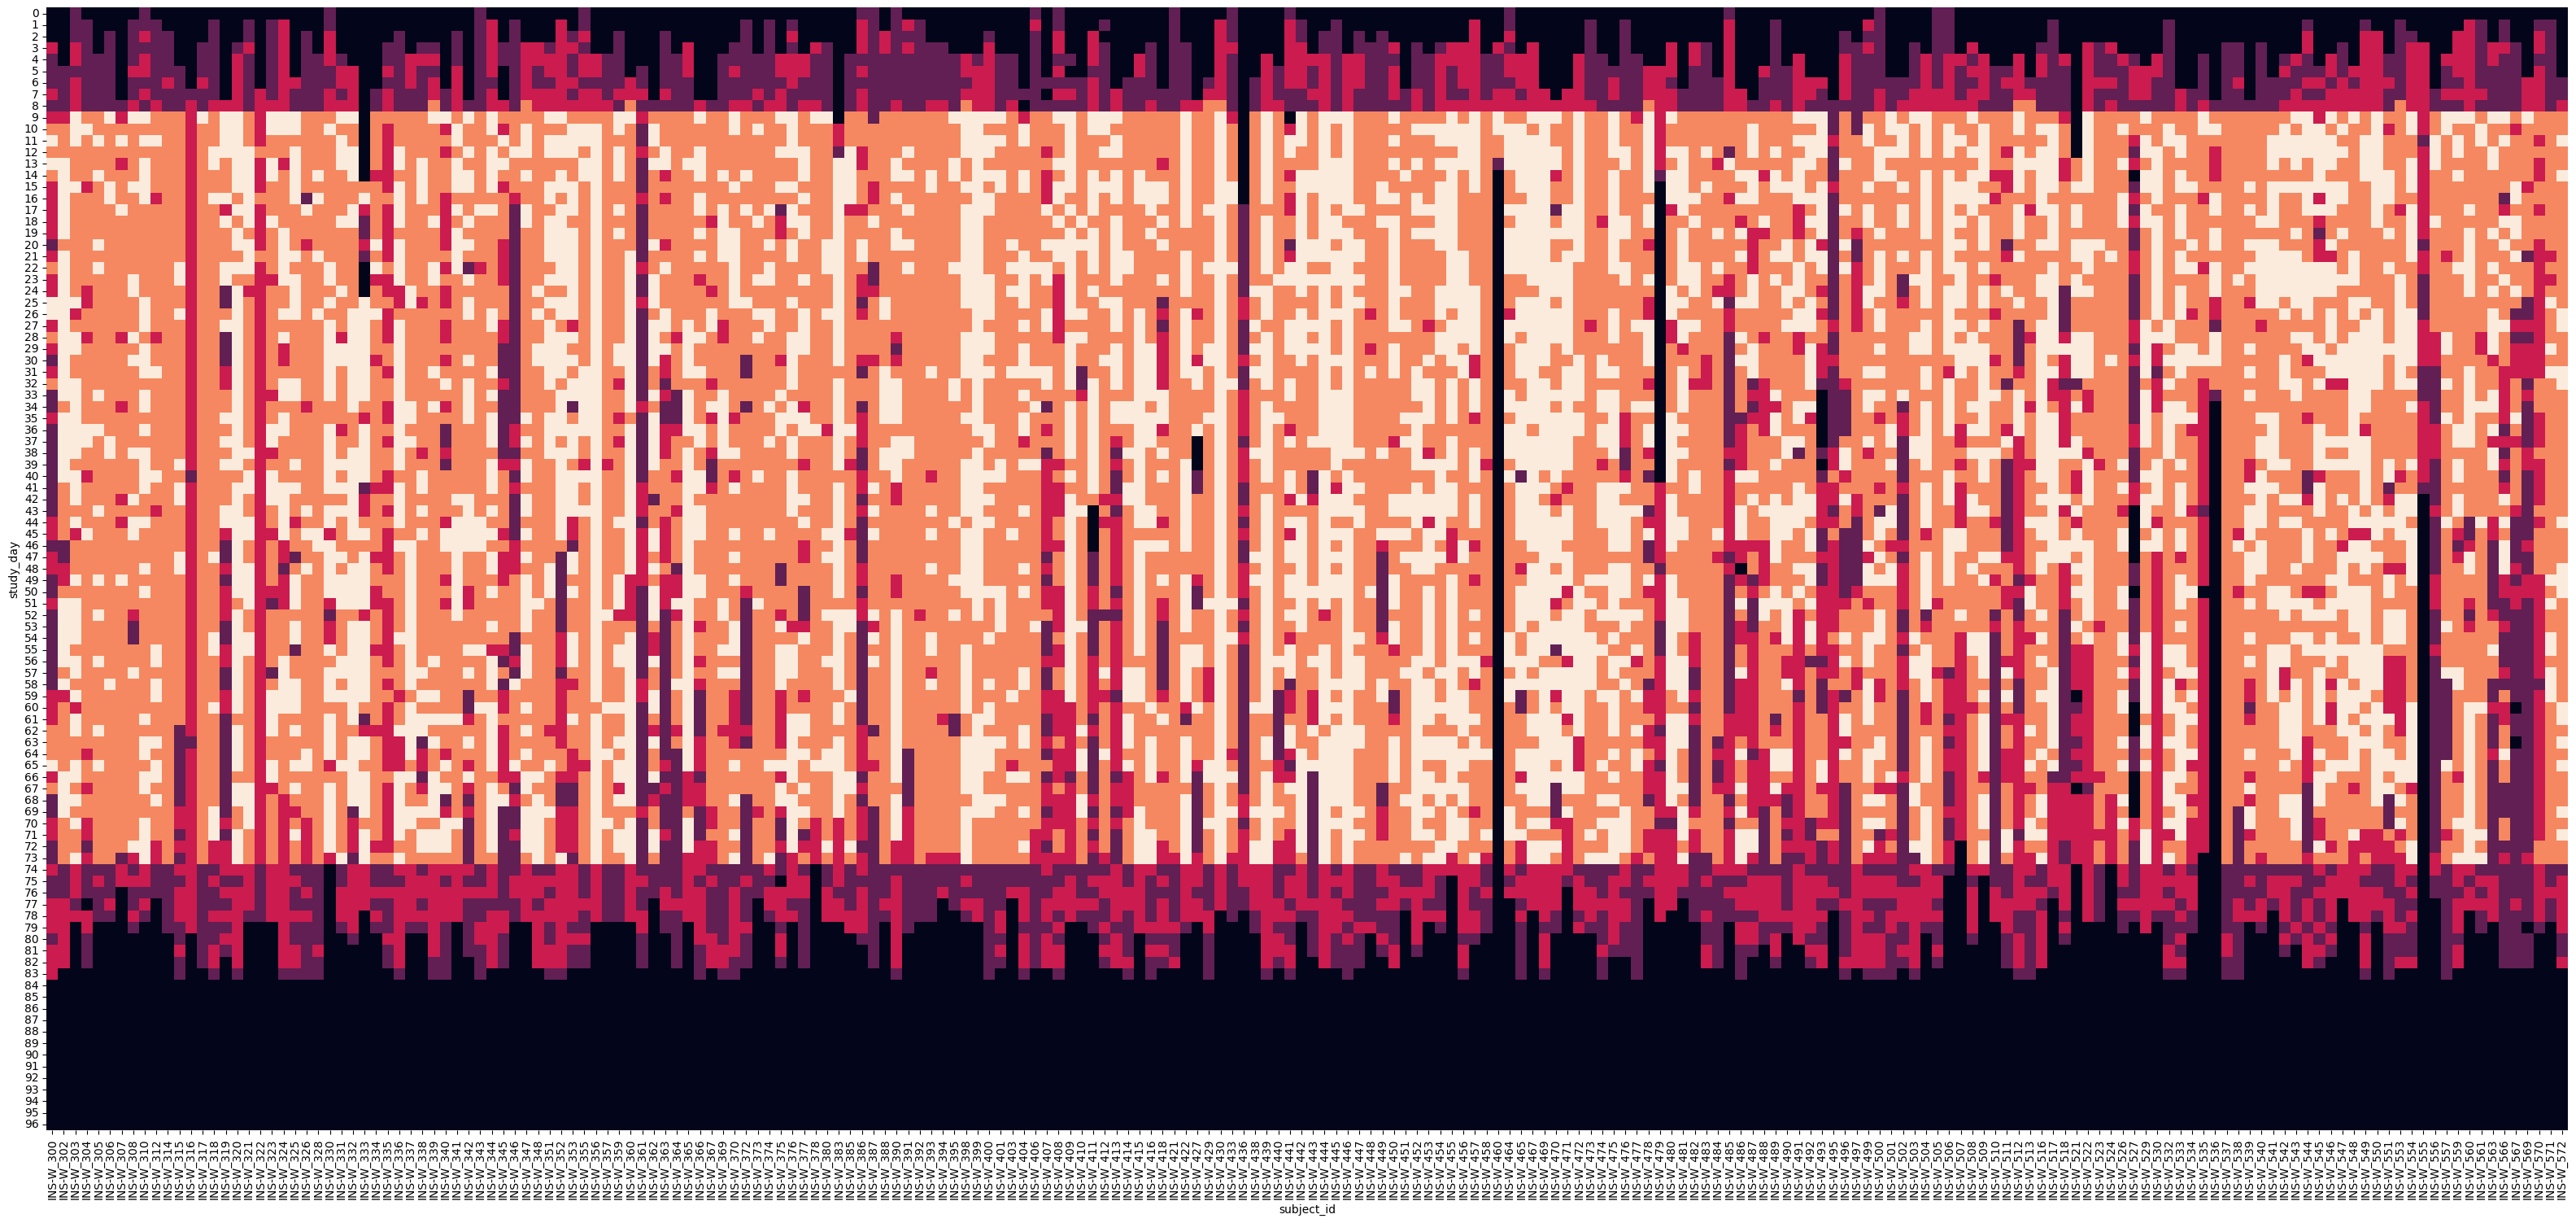

In [85]:
data_types_time = data.melt(
    id_vars=dataset.id_cols,
    value_vars=passive_feature_rep,
    var_name='feature',
    value_name='value'
).pivot_table(
    index=['study_day', 'feature'],
    columns='subject_id',
    aggfunc='count',
    values='value',
    fill_value=0
).reset_index().groupby(['study_day']).sum()
#avail_data = feat_time.sum(axis=1)
#avail_data
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(
    data_types_time,
    square=True,
    ax=ax,
    cbar=False
)

subject_id
INS-W_300     5
INS-W_302    37
INS-W_303    33
INS-W_304     4
INS-W_305    12
             ..
INS-W_567     7
INS-W_569     1
INS-W_570     0
INS-W_571    10
INS-W_572    16
Length: 218, dtype: int64

In [114]:
data_types_time.sum().sort_values().head(n=27)

subject_id
INS-W_460     24
INS-W_555     68
INS-W_536     78
INS-W_436     85
INS-W_527     86
INS-W_479     88
INS-W_361     99
INS-W_495    115
INS-W_569    120
INS-W_556    125
INS-W_346    135
INS-W_485    139
INS-W_322    142
INS-W_316    143
INS-W_502    148
INS-W_567    148
INS-W_300    149
INS-W_386    152
INS-W_518    153
INS-W_363    154
INS-W_535    155
INS-W_345    159
INS-W_510    160
INS-W_493    162
INS-W_319    164
INS-W_407    165
INS-W_335    169
dtype: int64

In [119]:
[x for x in list(data_types_time.sum().sort_values().head(n=27).index) if x in keep_participants]

['INS-W_346',
 'INS-W_502',
 'INS-W_567',
 'INS-W_300',
 'INS-W_386',
 'INS-W_518',
 'INS-W_363',
 'INS-W_535',
 'INS-W_345',
 'INS-W_510',
 'INS-W_319',
 'INS-W_407']

subject_id
INS-W_497     0
INS-W_392     0
INS-W_394     0
INS-W_322     0
INS-W_537     0
             ..
INS-W_444    58
INS-W_469    59
INS-W_446    62
INS-W_356    63
INS-W_430    65
Length: 218, dtype: int64

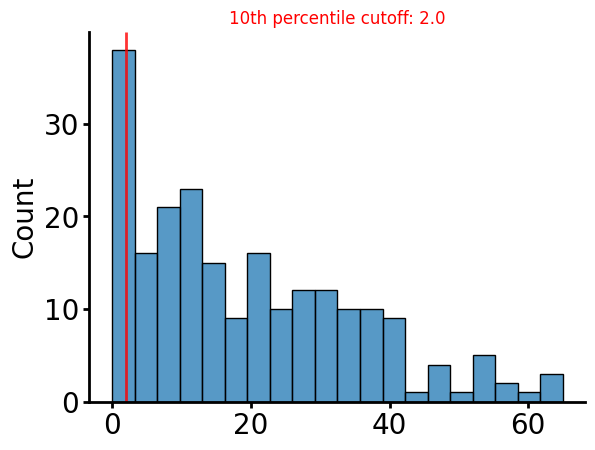

In [107]:
days_with_all_data = (data_types_time == 4).sum()
ax = sns.histplot(days_with_all_data,bins=20)
cutoff = days_with_all_data.quantile(.10)
keep_participants_passive = list(days_with_all_data[days_with_all_data >= cutoff].index)
ylim = ax.get_ylim()
ax.vlines([cutoff], *ylim, color='red', lw=2, alpha=.8)
ax.set_ylim(ylim)
ax.set_title(f'10th percentile cutoff: {cutoff}', color='red')
fa.despine_thicken_axes(ax)
days_with_all_data.sort_values()

count    218.000000
mean       9.408257
std        1.375669
min        1.000000
25%        9.000000
50%       10.000000
75%       10.000000
max       11.000000
Name: phq4, dtype: float64

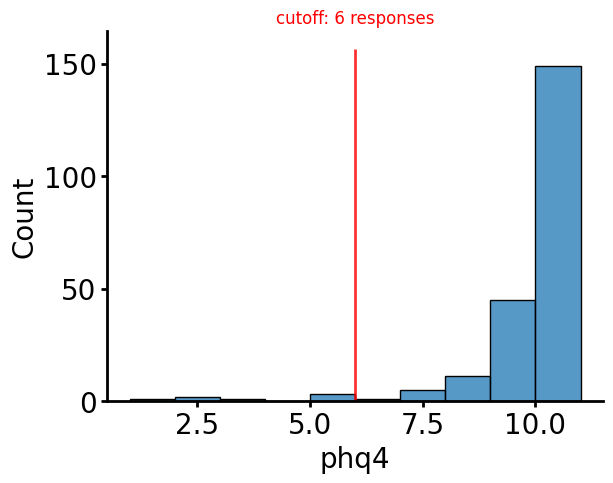

In [106]:
phq_avail = data.groupby(['subject_id']).phq4.count()
ax = sns.histplot(phq_avail, bins=10)
phq_cutoff = 6
keep_participants_active = list(phq_avail[phq_avail >= phq_cutoff].index)
ylim = ax.get_ylim()
ax.vlines([phq_cutoff], *ylim, color='red', lw=2, alpha=.8)
ax.set_title(f'cutoff: {phq_cutoff} responses', color='red')
fa.despine_thicken_axes(ax)
days_with_all_data.sort_values()
phq_avail.describe()

In [108]:
keep_participants = [s for s in keep_participants_passive if s in keep_participants_active]
len(keep_participants), data.subject_id.nunique()

(192, 218)

In [68]:
feat_time = data.melt(
    id_vars=dataset.id_cols,
    value_vars=passive_feature_rep,
    var_name='feature',
    value_name='value'
).pivot_table(
    index=['subject_id'],
    columns=['feature','study_day'],
    aggfunc='count',
    values='value',
    fill_value=0
)
feat_time

feature    f_call:phone_calls_rapids_outgoing_meanduration:allday              \
study_day                                                      0  1  2  3  4    
subject_id                                                                      
INS-W_300                                                   0      0  0  1  0   
INS-W_302                                                   0      0  0  0  0   
INS-W_303                                                   0      0  0  1  1   
INS-W_304                                                   0      0  0  0  0   
INS-W_305                                                   0      0  0  0  0   
...                                                       ...     .. .. .. ..   
INS-W_567                                                   0      0  0  0  0   
INS-W_569                                                   0      0  0  0  0   
INS-W_570                                                   0      0  1  1  0   
INS-W_571                                                   0      0  0  0  0   
INS-W_572                                                   0      0  0  0  0   

feature                    ...  \
study_day  5  6  7  8  9   ...   
subject_id                 ...   
INS-W_300   0  0  1  0  0  ...   
INS-W_302   0  0  0  0  0  ...   
INS-W_303   0  1  1  1  1  ...   
INS-W_304   0  0  0  0  0  ...   
INS-W_305   0  0  0  0  0  ...   
...        .. .. .. .. ..  ...   
INS-W_567   0  0  0  0  0  ...   
INS-W_569   0  1  1  1  1  ...   
INS-W_570   1  1  1  1  1  ...   
INS-W_571   0  0  0  0  0  ...   
INS-W_572   0  0  0  0  0  ...   

feature    f_steps:fitbit_steps_intraday_rapids_sumsteps:allday              \
study_day                                                    87 88 89 90 91   
subject_id                                                                    
INS-W_300                                                   0    0  0  0  0   
INS-W_302                                                   0    0  0  0  0   
INS-W_303                                                   0    0  0  0  0   
INS-W_304                                                   0    0  0  0  0   
INS-W_305                                                   0    0  0  0  0   
...                                                       ...   .. .. .. ..   
INS-W_567                                                   0    0  0  0  0   
INS-W_569                                                   0    0  0  0  0   
INS-W_570                                                   0    0  0  0  0   
INS-W_571                                                   0    0  0  0  0   
INS-W_572                                                   0    0  0  0  0   

feature                    
study_day  92 93 94 95 96  
subject_id                 
INS-W_300   0  0  0  0  0  
INS-W_302   0  0  0  0  0  
INS-W_303   0  0  0  0  0  
INS-W_304   0  0  0  0  0  
INS-W_305   0  0  0  0  0  
...        .. .. .. .. ..  
INS-W_567   0  0  0  0  0  
INS-W_569   0  0  0  0  0  
INS-W_570   0  0  0  0  0  
INS-W_571   0  0  0  0  0  
INS-W_572   0  0  0  0  0  

[218 rows x 388 columns]

<AxesSubplot: xlabel='subject_id', ylabel='feature-study_day'>

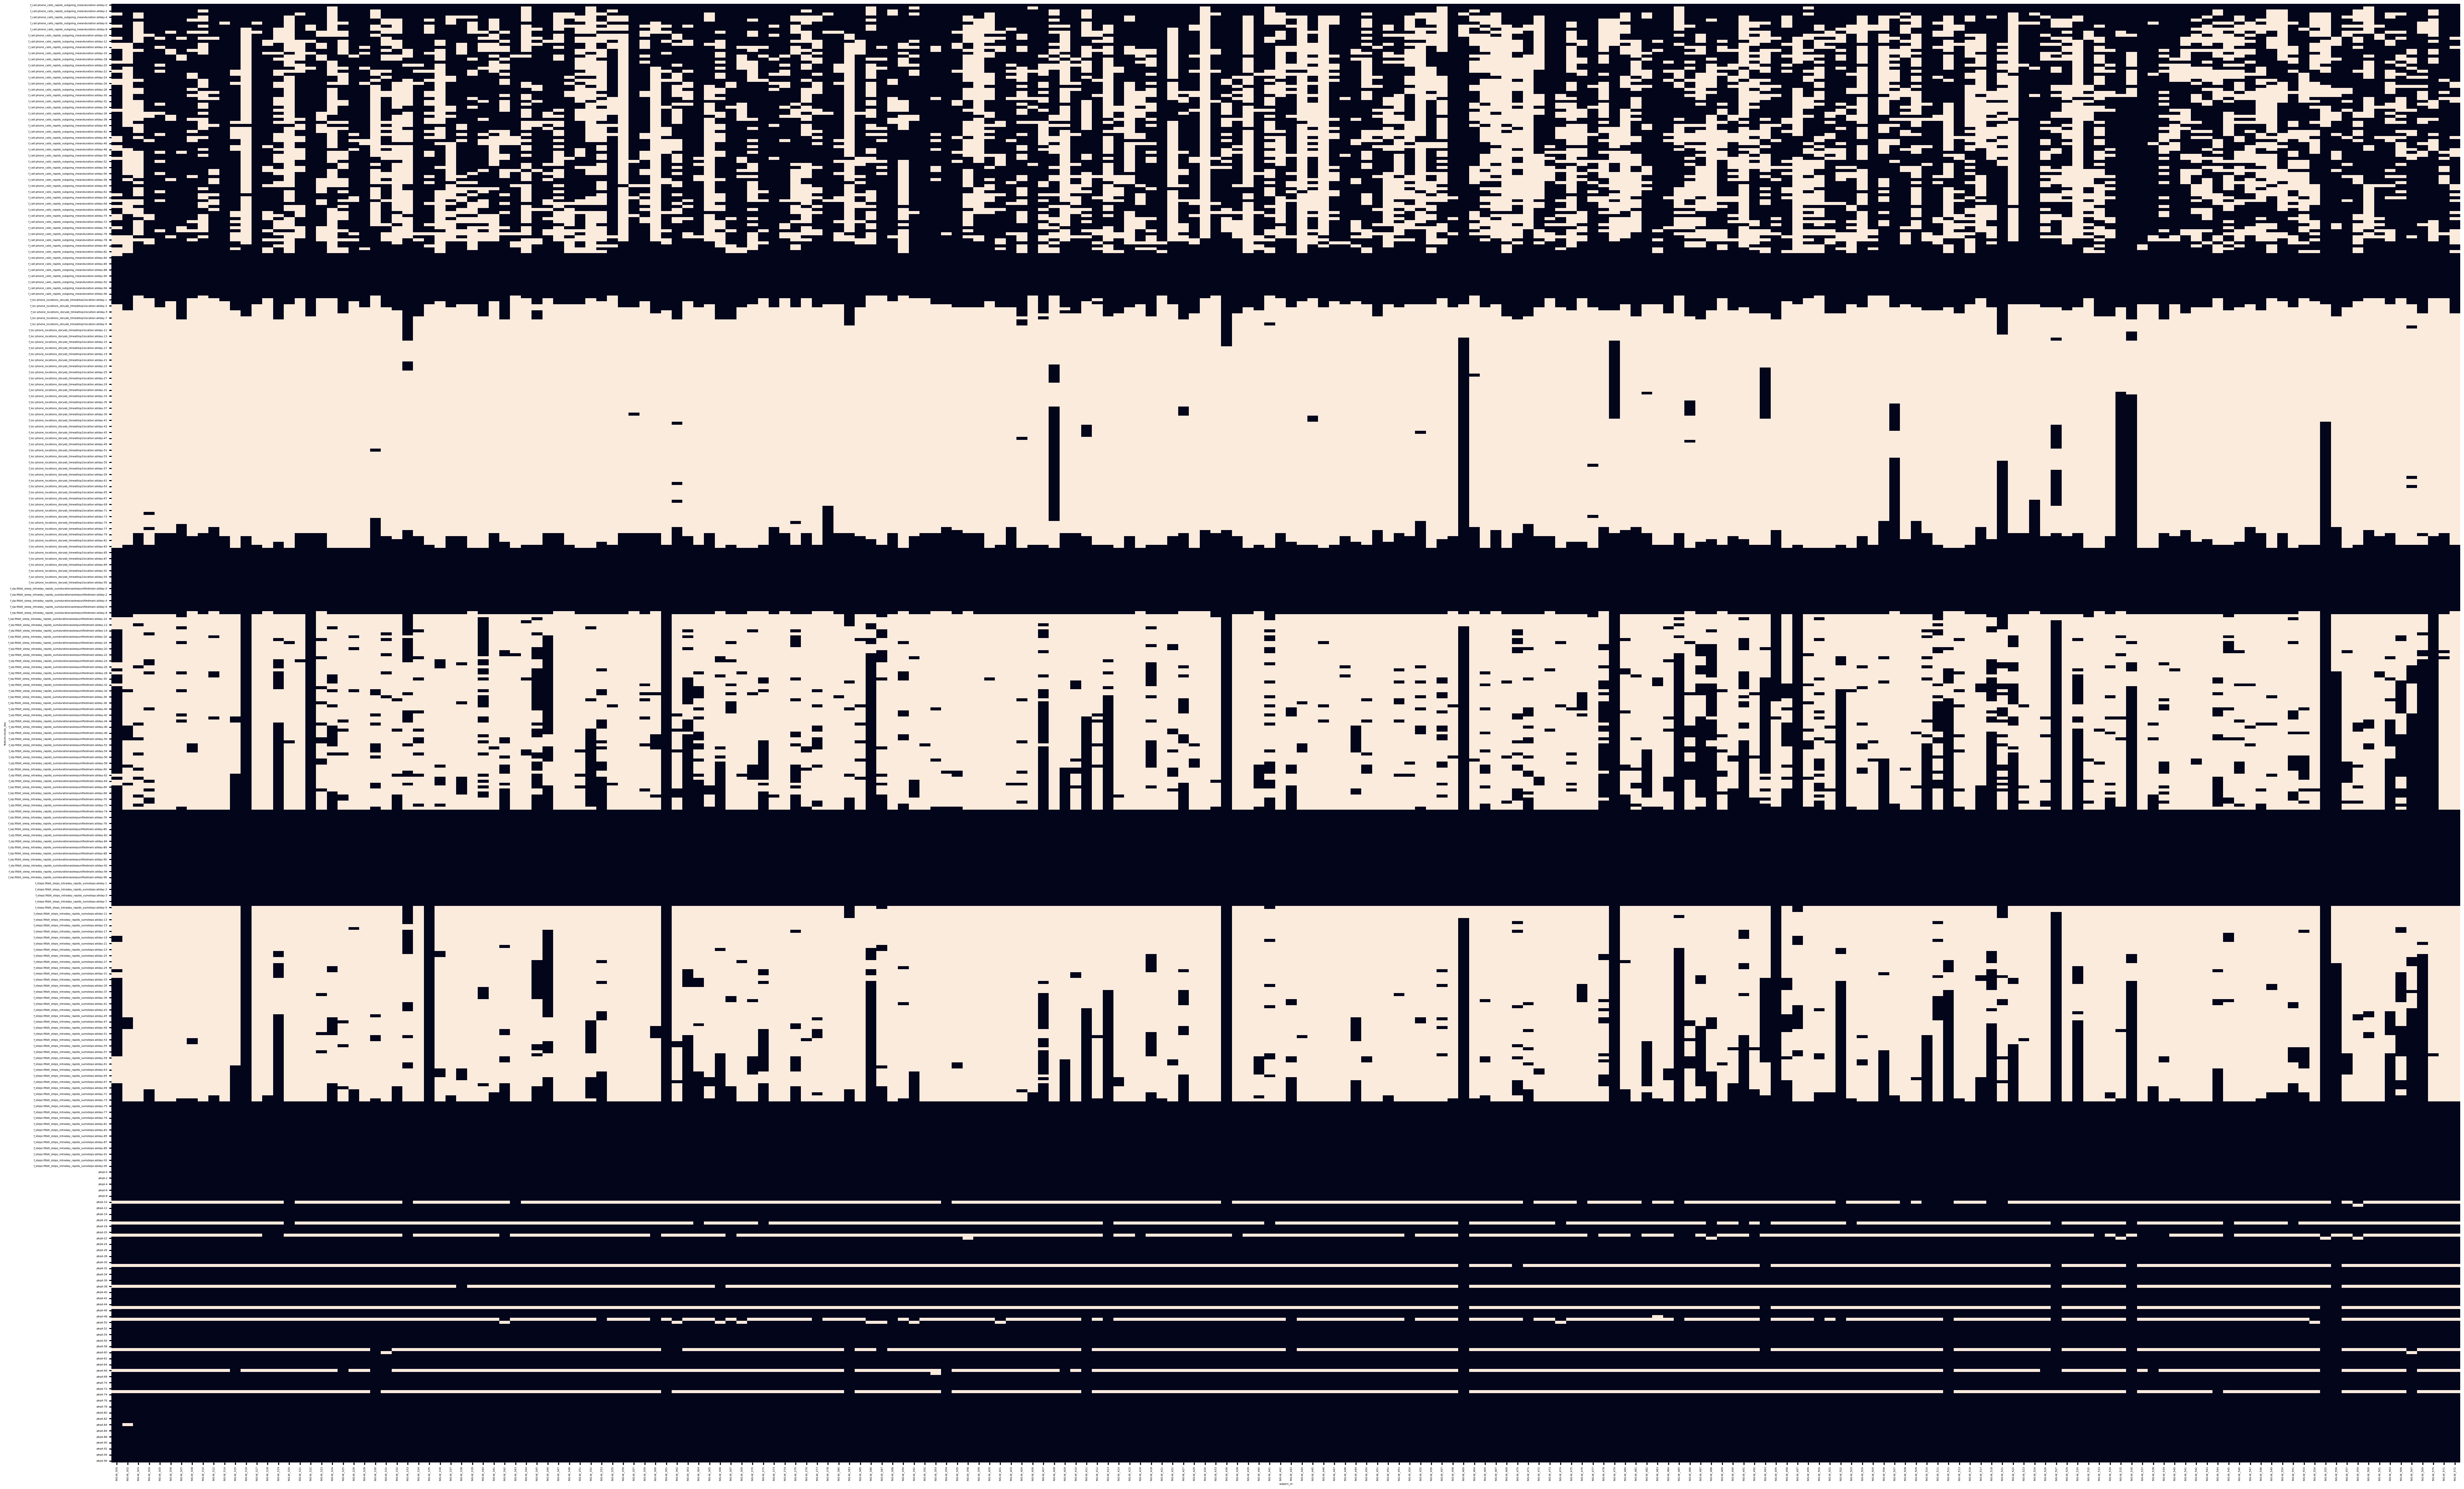

In [55]:
fig, ax = plt.subplots(figsize=(80,50))
sns.heatmap(
    feat_time.T,
    ax=ax,
    cbar=False
)

fa.despine_thicken_axes(ax, heatmap=True, fontsize=5, x_rotation=90)

(197, 218)

In [113]:
for (sid, platform), subject_data in tqdm(data.groupby(['subject_id', 'platform'])):
    if sid not in keep_participants:
        continue
    fig, axes = plots.lineplot_features(
        subject_data.drop(['date'], axis=1),
        plot_features,
        scatter=True,
        palette=palette
    )
    fig.suptitle(f'Subject {sid} - {platform}')
    fname = Path(fig_dir, f'{sid}_lineplot.png')
    fig.savefig(fname)
    plt.close()

  0%|          | 0/192 [00:00<?, ?it/s]


NameError: name 'keep_participants' is not defined

In [79]:
for f in plot_features:
    if f.startswith('phq'):
        print(
            '"' + f + '": "#004488",',
        )
    elif f.startswith('f_steps'):
        print(
            '"' + f + '": "#228833",',
        )
    elif f.startswith('f_slp'):
        print(
            '"' + f + '": "#AA3377",',
        )
    elif f.startswith('f_call'):
        print(
            '"' + f + '": "#44AA99",',
        )
    elif f.startswith('f_loc'):
        print(
            '"' + f + '": "#555555",',
        )
    else:
        print(
            '"' + f + '": "gray",',
        )

"phq4": "#004488",
"f_loc:phone_locations_doryab_timeattop1location:allday": "#555555",
"f_loc:phone_locations_doryab_timeathome:allday": "#555555",
"f_loc:phone_locations_doryab_outlierstimepercent:allday": "#555555",
"f_loc:phone_locations_doryab_locationentropy:allday": "#555555",
"f_loc:phone_locations_doryab_movingtostaticratio:allday": "#555555",
"f_loc:phone_locations_barnett_circdnrtn:allday": "#555555",
"f_steps:fitbit_steps_intraday_rapids_sumsteps:allday": "#228833",
"f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday": "#228833",
"f_steps:fitbit_steps_intraday_rapids_countepisodeactivebout:allday": "#228833",
"f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday": "#228833",
"f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday": "#AA3377",
"f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday": "#AA3377",
"f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:allday": "#AA3377",
"f_slp:fitbit_sle

In [121]:
for p in data.subject_id.unique():
    if p not in keep_participants:
        print(f"'{p}',")

'INS-W_314',
'INS-W_316',
'INS-W_317',
'INS-W_322',
'INS-W_335',
'INS-W_361',
'INS-W_392',
'INS-W_394',
'INS-W_421',
'INS-W_436',
'INS-W_460',
'INS-W_479',
'INS-W_485',
'INS-W_493',
'INS-W_495',
'INS-W_497',
'INS-W_505',
'INS-W_512',
'INS-W_523',
'INS-W_527',
'INS-W_536',
'INS-W_537',
'INS-W_555',
'INS-W_556',
'INS-W_569',
'INS-W_570',


In [99]:
data

,subject_id,platform,date,study_day,f_loc:phone_locations_locmap_percent_in_locmap_greens:allday,f_loc:phone_locations_locmap_duration_in_locmap_greens:allday,f_loc:phone_locations_locmap_percent_in_locmap_exercise:allday,f_loc:phone_locations_locmap_duration_in_locmap_exercise:allday,f_loc:phone_locations_locmap_percent_in_locmap_study:allday,f_loc:phone_locations_doryab_avglengthstayatclusters:allday,...,f_call:phone_calls_rapids_missed_countmostfrequentcontact:morning,f_call:phone_calls_rapids_missed_distinctcontacts:morning,f_call:phone_calls_rapids_missed_count:morning,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:evening,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:evening,f_call:phone_calls_rapids_missed_timefirstcall:afternoon,f_call:phone_calls_rapids_missed_timelastcall:afternoon,f_call:phone_calls_rapids_outgoing_stdduration:evening,f_call:phone_calls_rapids_outgoing_stdduration:afternoon,phq4
0,INS-W_300,ios,2019-03-21,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INS-W_300,ios,2019-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INS-W_300,ios,2019-03-23,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INS-W_300,ios,2019-03-24,3,0.000000,0.000000,0.000000,0.000000,0.000000,158.768383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INS-W_300,ios,2019-03-25,4,1.299894,18.718083,6.537361,94.136033,6.067866,1285.315367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21141,INS-W_572,ios,2019-06-21,92,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21142,INS-W_572,ios,2019-06-22,93,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21143,INS-W_572,ios,2019-06-23,94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21144,INS-W_572,ios,2019-06-24,95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

data = dataset.data
min_days = 7
imputer = IterativeImputer(initial_strategy='median', keep_empty_features=True)
imputed = data.copy()
for sid, subject_data in tqdm(data.groupby('subject_id'), desc='imputing'):
    filled_data = np.full(
            (
                subject_data.shape[0], len(features)
            ),
            np.nan
    )
    for i in range(subject_data.shape[0]):
            if i > min_days:
                # Training set
                X = subject_data.iloc[0: i][features]
                X_fill = imputer.fit_transform(X)
                filled_data[i] = X_fill[-1]
    imputed.loc[imputed.subject_id == sid, features] = filled_data
imputed.head(n=10)

imputing: 100%|██████████| 192/192 [01:20<00:00,  2.39it/s]


,subject_id,platform,date,study_day,f_loc:phone_locations_locmap_percent_in_locmap_greens:allday,f_loc:phone_locations_locmap_duration_in_locmap_greens:allday,f_loc:phone_locations_locmap_percent_in_locmap_exercise:allday,f_loc:phone_locations_locmap_duration_in_locmap_exercise:allday,f_loc:phone_locations_locmap_percent_in_locmap_study:allday,f_loc:phone_locations_doryab_avglengthstayatclusters:allday,...,f_call:phone_calls_rapids_missed_countmostfrequentcontact:morning,f_call:phone_calls_rapids_missed_distinctcontacts:morning,f_call:phone_calls_rapids_missed_count:morning,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:evening,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:evening,f_call:phone_calls_rapids_missed_timefirstcall:afternoon,f_call:phone_calls_rapids_missed_timelastcall:afternoon,f_call:phone_calls_rapids_outgoing_stdduration:evening,f_call:phone_calls_rapids_outgoing_stdduration:afternoon,phq4
0,INS-W_300,ios,2019-03-21,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INS-W_300,ios,2019-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INS-W_300,ios,2019-03-23,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INS-W_300,ios,2019-03-24,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INS-W_300,ios,2019-03-25,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,INS-W_300,ios,2019-03-26,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,INS-W_300,ios,2019-03-27,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,INS-W_300,ios,2019-03-28,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,INS-W_300,ios,2019-03-29,8,0.483531,6.962700,6.376005,91.812517,3.987108,315.276717,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,13.114877,0.0,NaN
9,INS-W_300,ios,2019-03-30,9,4.290718,39.884017,3.031110,28.175433,10.763172,180.704903,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,13.114877,0.0,NaN


In [87]:

fig_dir_imputed = Path('..', 'output', f'GLOBEM_{year}', 'mice', 'lineplot')
fig_dir_imputed.mkdir(
    parents=True,
    exist_ok=True
)

In [110]:

for (sid, platform), subject_data in tqdm(imputed.groupby(['subject_id', 'platform'])):
    fig, axes = plots.lineplot_features(
        subject_data.drop(['date'], axis=1),
        plot_features,
        scatter=True,
        palette=palette
    )
    fig.suptitle(f'Subject {sid} - {platform}')
    fname = Path(fig_dir_imputed, f'{sid}_lineplot.png')
    fig.savefig(fname)
    plt.close()

100%|██████████| 192/192 [06:31<00:00,  2.04s/it]


/var/folders/yl/t10bslz11cgdwwfk10mvyr1h0000gn/T/ipykernel_15968/1990320940.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).reset_index().groupby(['study_day']).sum()


<AxesSubplot: xlabel='subject_id', ylabel='study_day'>

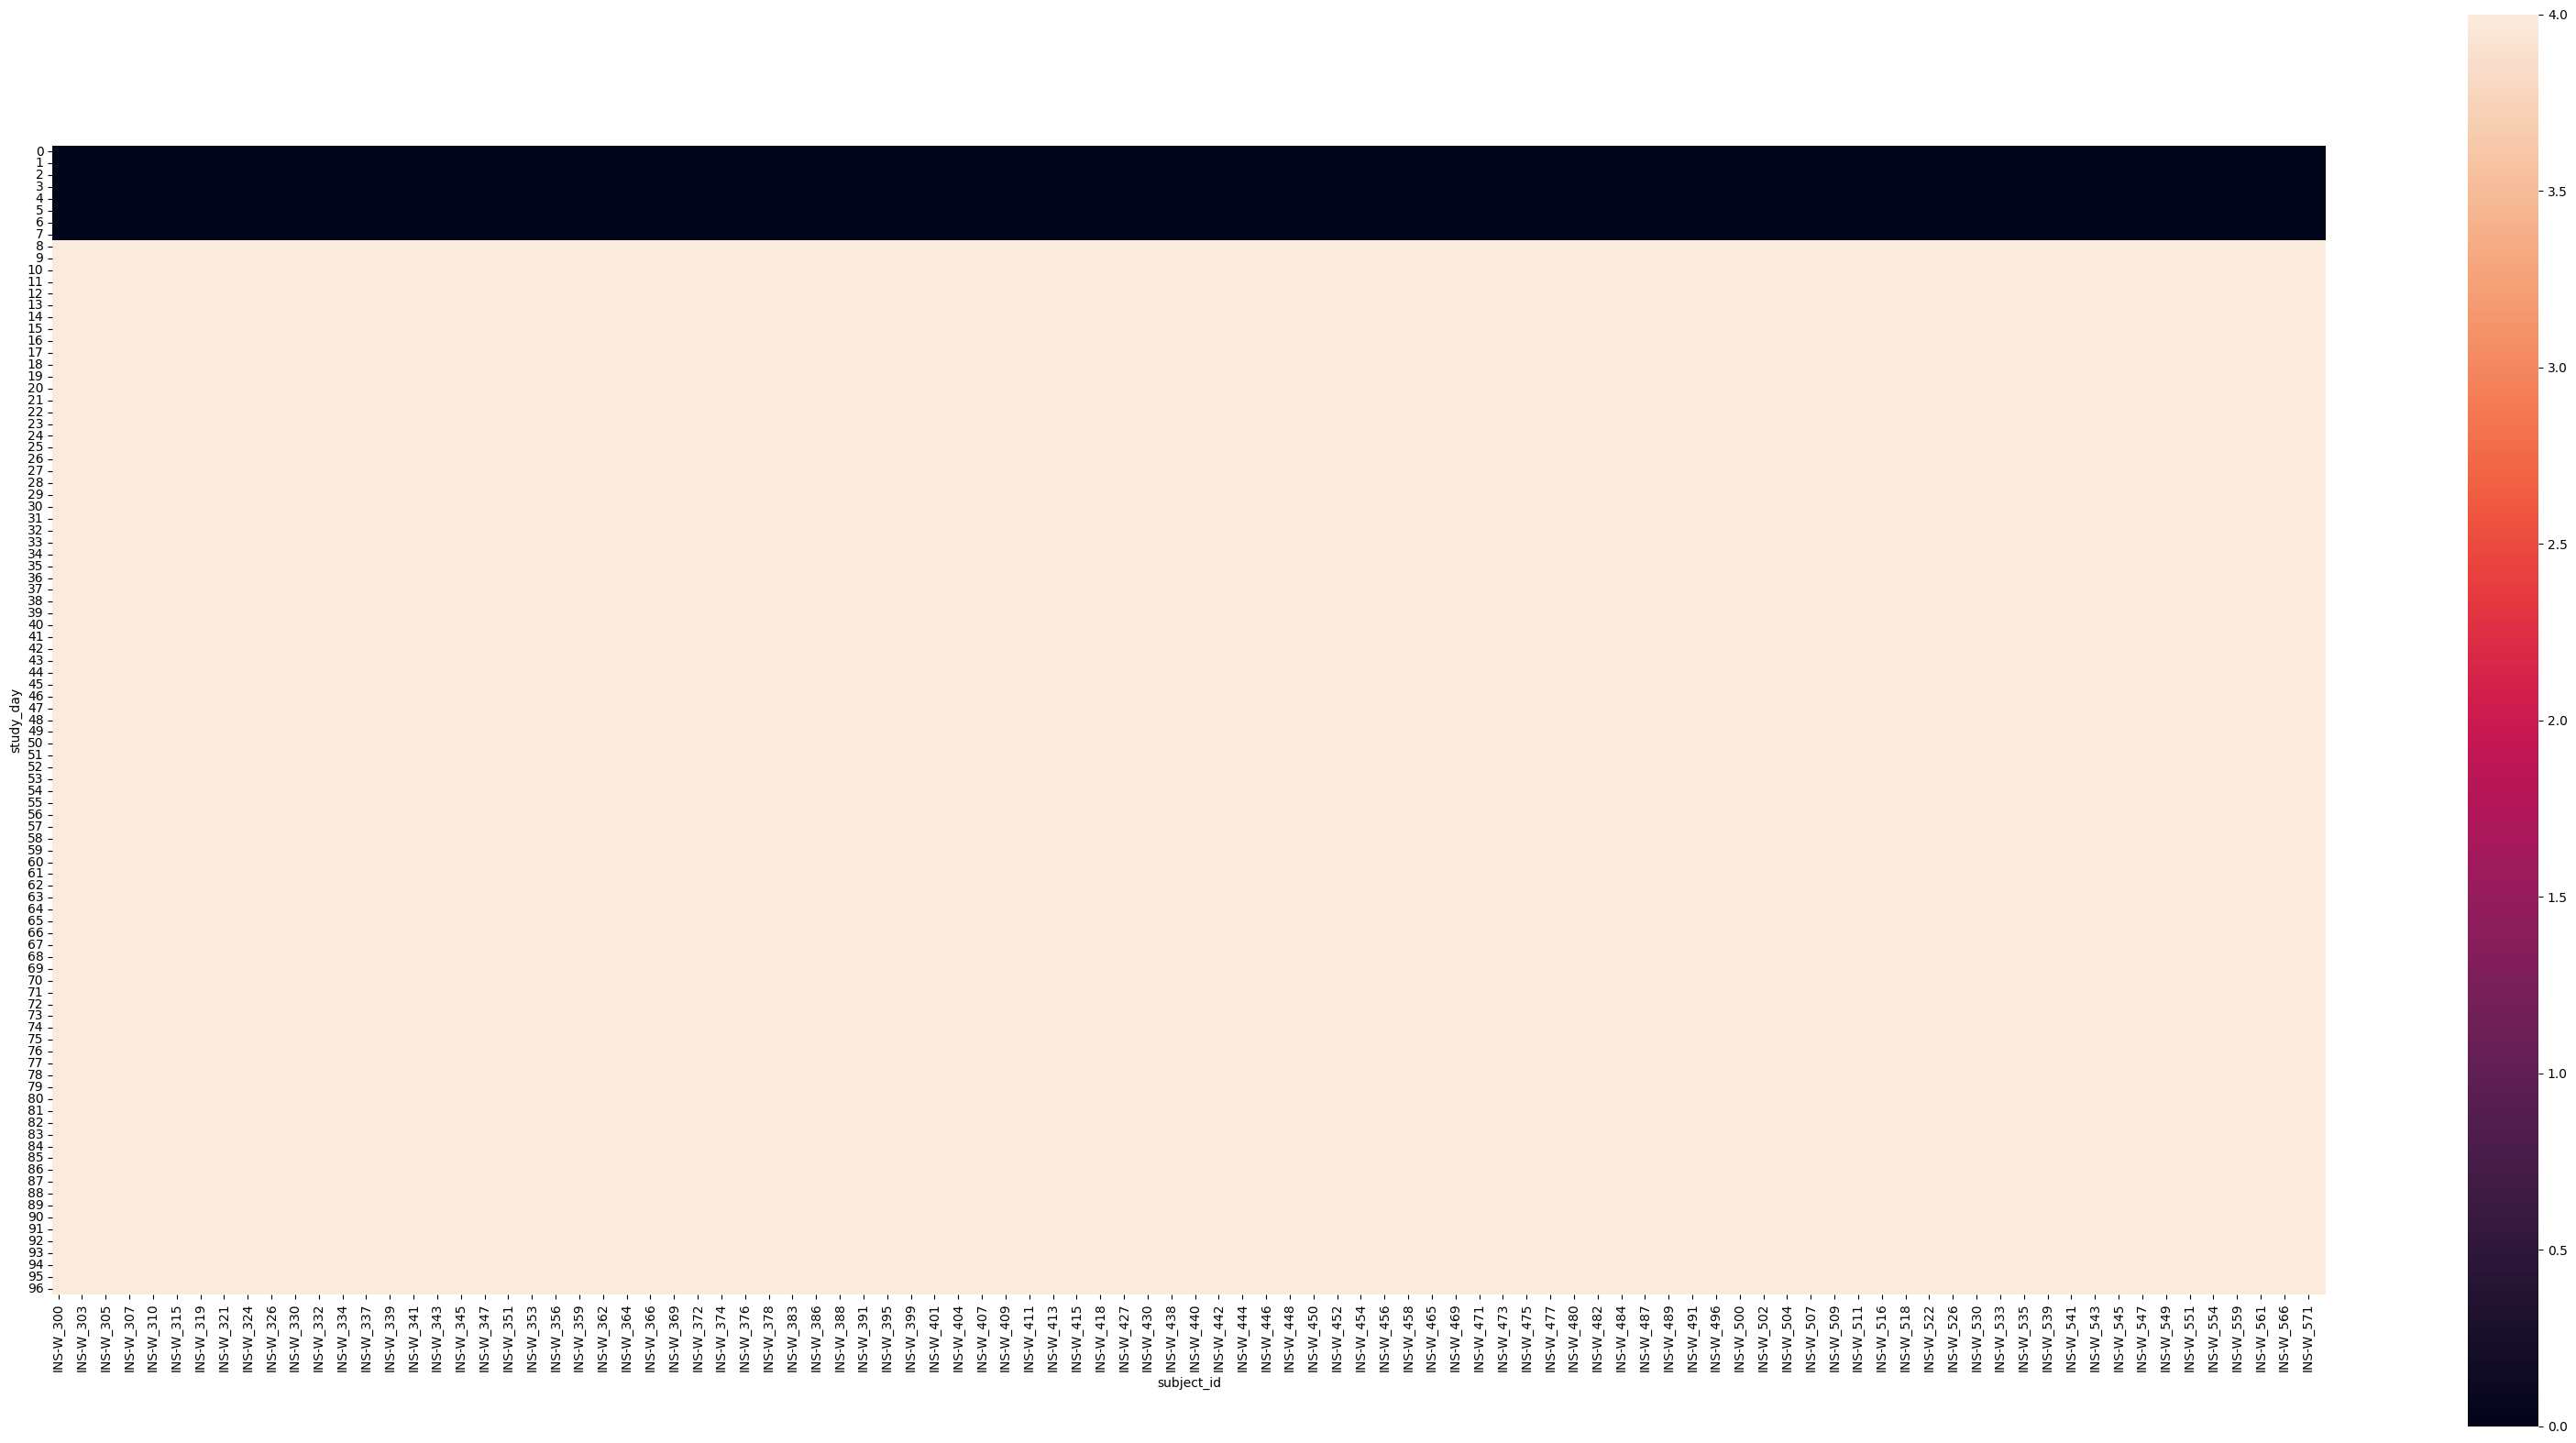

In [68]:
data_types_time = imputed.melt(
    id_vars=dataset.id_cols,
    value_vars=passive_feature_rep,
    var_name='feature',
    value_name='value'
).pivot_table(
    index=['study_day', 'feature'],
    columns='subject_id',
    aggfunc='count',
    values='value',
    fill_value=0
).reset_index().groupby(['study_day']).sum()
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(
    data_types_time,
    square=True,
    ax=ax,
)

# Attempt AD on GLOBEM
## Complete Cases based

In [131]:

features = dataset.sensor_cols
#features = plot_features[1:]
window_size = 30
max_missing_days = 5
n_components = 10
detectors = [
    ad.BaseRollingAnomalyDetector(
        features=features,
        window_size=window_size,
        max_missing_days=max_missing_days,
    ),
    ad.PCARollingAnomalyDetector(
        features=features,
        window_size=window_size,
        max_missing_days=max_missing_days,
        n_components=n_components
    ),
    ad.NMFRollingAnomalyDetector(
        features=features,
        window_size=window_size,
        max_missing_days=max_missing_days,
        n_components=n_components
    ),
   # ad.SVMRollingAnomalyDetector(
   #     features=features,
   #     window_size=window_size,
   #     max_missing_days=max_missing_days,
   #     n_components=n_components
   # )
]

In [132]:
for detector in detectors:
    # Remove # of components from name
    dname = detector.name.split('_')[0]
    imputed[f'{dname}_anomaly'] = np.nan
    for sid in tqdm(imputed.subject_id.unique(), desc=dname):
        subject_data = imputed.loc[imputed.subject_id == sid]
        imputed.loc[imputed.subject_id == sid, f'{dname}_anomaly'] = detector.labelAnomaly(subject_data)

NMF: 100%|██████████| 192/192 [00:08<00:00, 23.20it/s] 


In [133]:
def get_phq_periods(data, features,period=1) -> pd.DataFrame:
    anomaly_detector_cols = [d for d in data.columns if d.endswith("_anomaly")]
    if len(anomaly_detector_cols) == 0:
        raise ValueError('No anomaly detector columns')
    
    phq = data[['subject_id', 'study_day', 'phq4']]\
            .dropna()\
            .reset_index(drop=True)\
            .sort_values(by=['subject_id', 'study_day'])

    results_dict = {
        'subject_id': [],
        'start': [],
        'stop': [],
        'days': [],
        'complete_days': [],
        'phq_start': [],
        'phq_stop': [],
        'phq_change': [],
        **{
            c: [] for c in anomaly_detector_cols
        },
    }
    for i, row in tqdm(phq.iterrows()):
        last_row = phq.iloc[i-period]
        if last_row['subject_id'] != row['subject_id']:
            continue

        anomalies = data.loc[
            (
                (data.subject_id == row['subject_id']) &
                (data.study_day > last_row['study_day']) &
                (data.study_day <= row['study_day'])
            ),
            features + anomaly_detector_cols
        ]
        results_dict['subject_id'].append(row['subject_id'])
        results_dict['start'].append(last_row['study_day'])
        results_dict['stop'].append(row['study_day'])
        results_dict['days'] = row['study_day'] - last_row['study_day']
        results_dict['complete_days'].append(anomalies[features].dropna().shape[0])
        results_dict['phq_start'].append(last_row['phq4'])
        results_dict['phq_stop'].append(row['phq4'])
        results_dict['phq_change'].append(row['phq4'] - last_row['phq4'])
        for c in anomaly_detector_cols:
            results_dict[c] = anomalies[c].dropna().astype(int).sum()

    return pd.DataFrame(results_dict)    

phq_anomalies = get_phq_periods(imputed, features, period=1)
phq_anomalies.head()

1848it [00:11, 163.84it/s]


,subject_id,start,stop,days,complete_days,phq_start,phq_stop,phq_change,RollingMean_anomaly,PCA_anomaly,NMF_anomaly
0,INS-W_300,10,17,7,7,2.0,3.0,1.0,0,0,0
1,INS-W_300,17,21,7,4,3.0,3.0,0.0,0,0,0
2,INS-W_300,21,31,7,10,3.0,5.0,2.0,0,0,0
3,INS-W_300,31,38,7,7,5.0,5.0,0.0,0,0,0
4,INS-W_300,38,45,7,7,5.0,2.0,-3.0,0,0,0


In [134]:
phq_anomalies.describe().round(2)

,start,stop,days,complete_days,phq_start,phq_stop,phq_change,RollingMean_anomaly,PCA_anomaly,NMF_anomaly
count,1656.00,1656.00,1656.0,1656.00,1656.00,1656.00,1656.00,1656.0,1656.0,1656.0
mean,37.51,44.71,7.0,7.20,3.08,3.16,0.09,0.0,0.0,0.0
std,18.02,18.20,0.0,2.31,2.84,2.89,1.99,0.0,0.0,0.0
min,10.00,17.00,7.0,1.00,0.00,0.00,-9.00,0.0,0.0,0.0
25%,21.00,31.00,7.0,7.00,1.00,1.00,-1.00,0.0,0.0,0.0
50%,38.00,45.00,7.0,7.00,3.00,3.00,0.00,0.0,0.0,0.0
75%,49.00,59.00,7.0,7.00,4.00,5.00,1.00,0.0,0.0,0.0
max,73.00,84.00,7.0,21.00,12.00,12.00,11.00,0.0,0.0,0.0
